# Summary

# Imports

In [1]:
%run _imports.ipynb

Setting the PYTHON_VERSION environment variable.
Setting the SPARK_MASTER environment variable.
Setting the SPARK_ARGS environment variable.
Setting the DB_TYPE environment variable.
Setting the DB_PORT environment variable.


2017-12-12 15:53:49.752932


In [4]:
%run _settings.ipynb

In [2]:
NOTEBOOK_NAME = 'create_homology_models'
NOTEBOOK_PATH = Path(NOTEBOOK_NAME).absolute()
NOTEBOOK_PATH.mkdir(exist_ok=True)

# Parameters

## Input

In [4]:
INPUT_DATA_PATH = Path('construct_adjacency_matrix/adjacency_matrix_2.parquet').absolute()

In [5]:
INPUT_PARQUET_FILES = list(INPUT_DATA_PATH.glob('*/*.parquet'))

In [8]:
INPUT_PARQUET_FILES[:3]

[PosixPath('/home/kimlab2/database_data/datapkg/uniparc_domain/notebooks/construct_adjacency_matrix/adjacency_matrix_2.parquet/database_id=G3DSA%3A1.10.10.400/part-00148-9097eabe-2bc3-48d9-aa6d-e84d92b8380c.c000.snappy.parquet'),
 PosixPath('/home/kimlab2/database_data/datapkg/uniparc_domain/notebooks/construct_adjacency_matrix/adjacency_matrix_2.parquet/database_id=G3DSA%3A1.10.10.400/part-00019-9097eabe-2bc3-48d9-aa6d-e84d92b8380c.c000.snappy.parquet'),
 PosixPath('/home/kimlab2/database_data/datapkg/uniparc_domain/notebooks/construct_adjacency_matrix/adjacency_matrix_2.parquet/database_id=G3DSA%3A1.10.10.400/part-00169-9097eabe-2bc3-48d9-aa6d-e84d92b8380c.c000.snappy.parquet')]

## Output

In [9]:
OUTPUT_PATH = NOTEBOOK_PATH.joinpath('test_3')
OUTPUT_PATH.mkdir(exist_ok=True)

# Data

In [7]:
result_df = pq.read_table(INPUT_PARQUET_FILES[0].as_posix()).to_pandas()

In [8]:
display(result_df.head(1))
print(result_df.shape)

uniparc_id                                                                                                                 sequence database             interpro_name interpro_id  domain_start  domain_end  __index_level_0__  domain_length structure_id  model_id chain_id  pc_identity  alignment_length  mismatches  gap_opens  q_start  q_end  s_start  s_end  evalue_log10  bitscore                                                                                                                     qseq                                                                                                                     sseq                                                                                                                      a2b                                                                                                                      b2a                                                                                                            residue_idx_1  \
0  UPI00081204C1  AAAAHIEQLMPQDLSQPWGFSSVTTNPRLVTATILDKKEYWSSRFNLASLSPGELRKQLYDEVIAEGASTLKPLWVQSAQADGWICAQVDPSDVRCSERMTARGLELHRLAANVMV...   Gene3D  Aldolase-type TIM barrel   IPR013785           262         562          557056966            301         3R5E       0.0        A         26.6             188.0       126.0        4.0     23.0  201.0     41.0  225.0      -8.69897      58.9  VTTNPRLVTATILDKKEYWS--SRFNLASLSPGELRKQLYDEVIAEGASTLKPLWVQSAQADGWICAQVDPSDVRCSERMTARGLELHRLAA-----NVMVKVPGSLEGFATIEHL...  VTTNPAIFAAAMSKGDSYDAQIAELKAAGASVDQAVYAMSIDDVRNACDLFTGIFESSNGYDGRVSIEVDP---RISADRDATLAQAKELWAKVDRPNVMIKIPATPGSLPAITDA...  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, nan,...  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 23.0...  [40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 4...   

                                                                                                             residue_idx_2                                                                                                             residue_id_1                                                                                                             residue_id_2                                                                                                             residue_aa_1                                                                                                             residue_aa_2                                                                                                  residue_idx_1_corrected                                                                                                  residue_idx_2_corrected  
0  [41.0, 42.0, 90.0, 103.0, 104.0, 105.0, 40.0, 42.0, 43.0, 105.0, 138.0, 160.0, 40.0, 41.0, 43.0, 44.0, 83.0, 105.0, ...  [41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 4...  [42.0, 43.0, 91.0, 104.0, 105.0, 106.0, 41.0, 43.0, 44.0, 106.0, 139.0, 161.0, 41.0, 42.0, 44.0, 45.0, 84.0, 106.0, ...  [V, V, V, V, V, V, T, T, T, T, T, T, T, T, T, T, T, T, T, T, T, N, N, N, N, N, N, N, N, N, P, P, P, P, P, P, P, P, A...  [T, T, F, R, V, S, V, T, N, S, K, N, V, T, N, P, V, S, I, E, K, T, T, P, A, I, F, A, E, K, T, N, A, I, F, A, A, E, N...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, ...  [1.0, 2.0, 48.0, 61.0, 62.0, 63.0, 0.0, 2.0, 3.0, 63.0, 94.0, 116.0, 0.0, 1.0, 3.0, 4.0, 41.0, 63.0, 64.0, 65.0, 94....

(9369, 34)


# Create homology model

In [27]:
# row = list(result_df[
#     (result_df['pc_identity'] > 60) & 
#     (result_df['qseq'].str.count('-') > 5) &
#     (result_df['sseq'].str.count('-') > 5)


# ].itertuples())[1]

In [28]:
row = list(result_df[
    (result_df['pc_identity'] > 90)
].itertuples())[0]

In [29]:
(row.structure_id, row.model_id, row.chain_id)

('3MO7', 0.0, 'A')

### Template structure

In [30]:
template = kmbio.PDB.load(f'rcsb://{row.structure_id}.cif', bioassembly_id=1)

In [31]:
list(template.models)

[<Model id=0>, <Model id=1>]

In [32]:
structure = kmbio.PDB.Structure(row.structure_id)
model = kmbio.PDB.Model(int(row.model_id))
structure.add(model)
chain = kmbio.PDB.Chain(row.chain_id)
model.add(chain)

In [33]:
residues = list(template[int(row.model_id)][row.chain_id])[int(row.s_start - 1):int(row.s_end - 1 + 1)]

seq = row.sseq.replace('-', '')
for i, residue in enumerate(residues):
    try:
        aa = kmtools.structure_tools.RESIDUE_MAPPING_TO_CANONICAL[residue.resname]
    except:
        aa = residue.resname
    aa = kmtools.structure_tools.AAA_DICT[aa]
    assert aa == seq[i]
    chain.add(residue.copy())

In [34]:
kmbio.PDB.save(structure, OUTPUT_PATH.joinpath('template.pdb').as_posix())

### Alignment

In [35]:
with OUTPUT_PATH.joinpath('alignment.ali').open('wt') as fout:
    fout.write(f"""\
>P1;template
structure:template:.:.:.:.::::
{row.sseq}*

>P1;target
sequence::.:.:.:.::::
{row.qseq}*
""")

In [36]:
!cat {OUTPUT_PATH.joinpath('alignment.ali')}

>P1;template
structure:template:.:.:.:.::::
KELSFGARAELPRIHPVASKLLRLMQKKETNLCLSADVSLARELLQLADALGPSICMLKTHVDILNDFTLDVMKELITLAKCHEFLIFEDRKFADIGNTVKKQYEGGIFKIASWADLVNAHVVPGSGVVKGLQEVGLPLHRGCLLIAEMSSTGSLATGDYTRAAVRMAEEHSEFVVGFISGSRVSMKPEFLHLTPGVQLEAGGDNLGQQYNSPQEVIGKRGSDIIIVGRGIISAADRLEAAEMYRKAAWEAYLSRLGV*

>P1;target
sequence::.:.:.:.::::
KELSFGARAELPGVHPLASKLLRLMQKKETNLCLSADVSEARELLQLADTLGPSICMLKTHVDILNDFTLDVMEELAALAKRHEFLIFEDRKFADIGNTVKKQYEGGIFKIASWADLVNAHVVPGSGVVKGLQEVGLPLHRACLLIAEMSSAGSLATGNYTKAAVGMAEEHCGFVVGFISGSRVSMKPEFLHLTPGVQLETGGDHLGQQYNSPQEVIGKRGSDVIIVGRGILAADNRLEAAEMYRKAAWEAYLNRLSV*


## Model

In [37]:
# Comparative modeling by the automodel class
from modeller import *              # Load standard Modeller classes
from modeller.automodel import *    # Load the automodel class

log.verbose()    # request verbose output
env = environ()  # create a new MODELLER environment to build this model in

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v19}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v19}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:       470979     459.940     0.449

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:       471507     460.456     0.450
openf___224_> Open           ${MODINSTALL9v19}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:       520107     507.917     0.496
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v19}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:       533407     520.905     0.509
openf___224_> Open           $

In [38]:
OUTPUT_PATH

PosixPath('/home/kimlab2/database_data/datapkg/uniparc_domain/notebooks/validate_adjacency_matrix/test_2')

In [39]:
# directories for input atom files
env.io.atom_files_directory = ['.', '../atom_files', OUTPUT_PATH.as_posix()]

In [40]:
a = automodel(env,
              alnfile  = OUTPUT_PATH.joinpath('alignment.ali').as_posix(),     # alignment filename
              knowns   = 'template',              # codes of the templates
              sequence = 'target')              # code of the target

In [41]:
a.starting_model= 1                 # index of the first model
a.ending_model  = 1                 # index of the last model
                                    # (determines how many models to calculate)

In [42]:
with kmtools.system_tools.switch_paths(OUTPUT_PATH.as_posix()):
    a.make()                            # do the actual comparative modeling

openf___224_> Open           /home/kimlab2/database_data/datapkg/uniparc_domain/notebooks/validate_adjacency_matrix/test_2/alignment.ali

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       544716     531.949     0.519

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       546166     533.365     0.521

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       549066     536.197     0.524

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       554866     541.861     0.529
openf___224_> Open           ./template.pdb

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       671922     656.174     0.641

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:       672950     657.178     0.642

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:       673978     658.182     0.643

Read the alignment from file       : /home/kimlab2/database_data/datapkg/uniparc_domain/notebooks/validate_adjacency_matrix/test_2/alignmen

make_re_422_> Number of previous, current restraints         :     8976     9183
make_re_423_> Number of previous, current selected restraints:     8711     8918
make_re_417_> Restraint type to be calculated:  chi2_dihedral

Dynamically allocated memory at   amaxstructure [B,KiB,MiB]:      2399791    2343.546     2.289
openf___224_> Open           ${MODINSTALL9v19}/modlib/chi1234.bin
openf___224_> Open           ${MODINSTALL9v19}/modlib/chi2.mdt
getdata_643_> Protein accepted:  template
getdata_289_> Proteins (all/accepted):        1        1

Dynamically allocated memory at  amaxrestraints [B,KiB,MiB]:      2530863    2471.546     2.414

Dynamically allocated memory at  amaxrestraints [B,KiB,MiB]:      2793007    2727.546     2.664
make_re_422_> Number of previous, current restraints         :     9183     9341
make_re_423_> Number of previous, current selected restraints:     8918     9076
make_re_417_> Restraint type to be calculated:  chi3_dihedral

Dynamically allocated memory at 

# Analyze homology model

In [53]:
import nglview as nv

In [45]:
target = kmbio.PDB.load(OUTPUT_PATH.joinpath('target.B99990001.pdb').as_posix())

## View structures

In [46]:
tmp = structure.copy()
chain = target[0][' '].copy()
chain.id = 'B'
tmp[0].add(chain)

In [47]:
view = kmbio.PDB.show(tmp)
view.add_representation('cartoon', selection='model = 1')
view

NGLWidget()

In [54]:
html_file = OUTPUT_PATH.relative_to(os.getcwd()).joinpath('target.html').as_posix()
nv.write_html(html_file, [view])

## Query adjacency matrix

In [64]:
q_interactions = kmtools.structure_tools.get_interactions(target, r_cutoff=5)

In [65]:
q_interactions.head()

structure_id  model_id_1  model_id_2 chain_id_1 chain_id_2  residue_idx_1  residue_idx_2  residue_id_1  residue_id_2 residue_name_1 residue_name_2 residue_aa_1 residue_aa_2
0           \n           0           0                                    0              1             1             2            LYS            GLU            K            E
1           \n           0           0                                    0              2             1             3            LYS            LEU            K            L
2           \n           0           0                                    1              0             2             1            GLU            LYS            E            K
3           \n           0           0                                    1              2             2             3            GLU            LEU            E            L
4           \n           0           0                                    1              3             2             4            GLU            SER            E            S

In [66]:
q_adjacency_matrix = np.eye(len(list(target.residues)))

In [67]:
for i, j in q_interactions[['residue_idx_1', 'residue_idx_2']].values:
    q_adjacency_matrix[i, j] = 1

## Template adjacency matrix

In [68]:
s_adjacency_matrix = np.eye(len(list(target.residues)))

In [69]:
for i, j in zip(row.residue_idx_1_corrected, row.residue_idx_2_corrected):
    if np.isnan(i) or np.isnan(j):
        print(i, j)
        continue
    s_adjacency_matrix[int(i), int(j)] = 1

### Compare

In [71]:
(s_adjacency_matrix != q_adjacency_matrix).sum() / (
    (s_adjacency_matrix.sum() + q_adjacency_matrix.sum()) / 2
)

0.051718494271685761

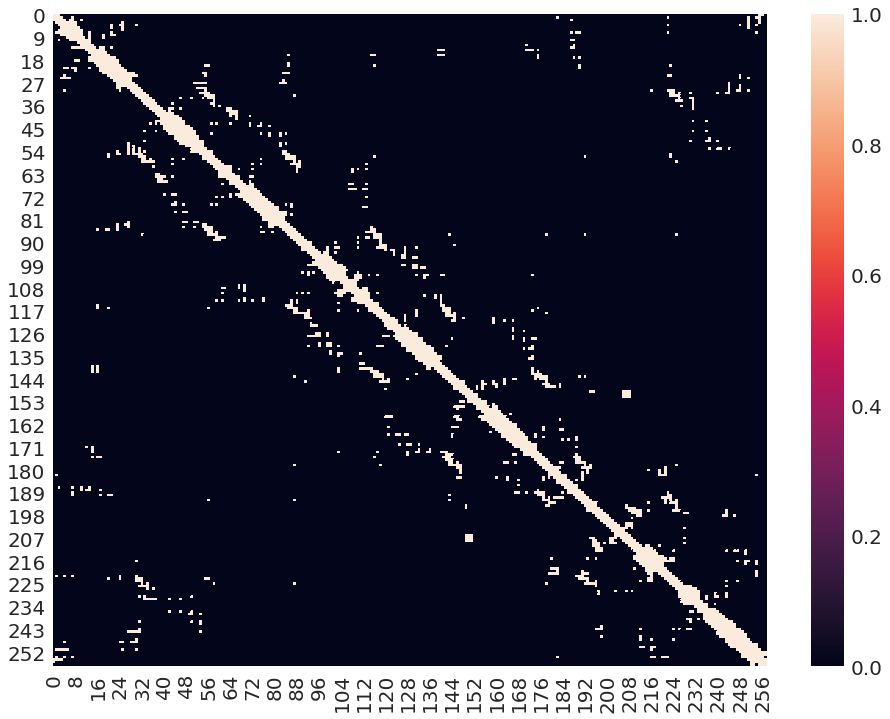

In [72]:
fg, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(s_adjacency_matrix)

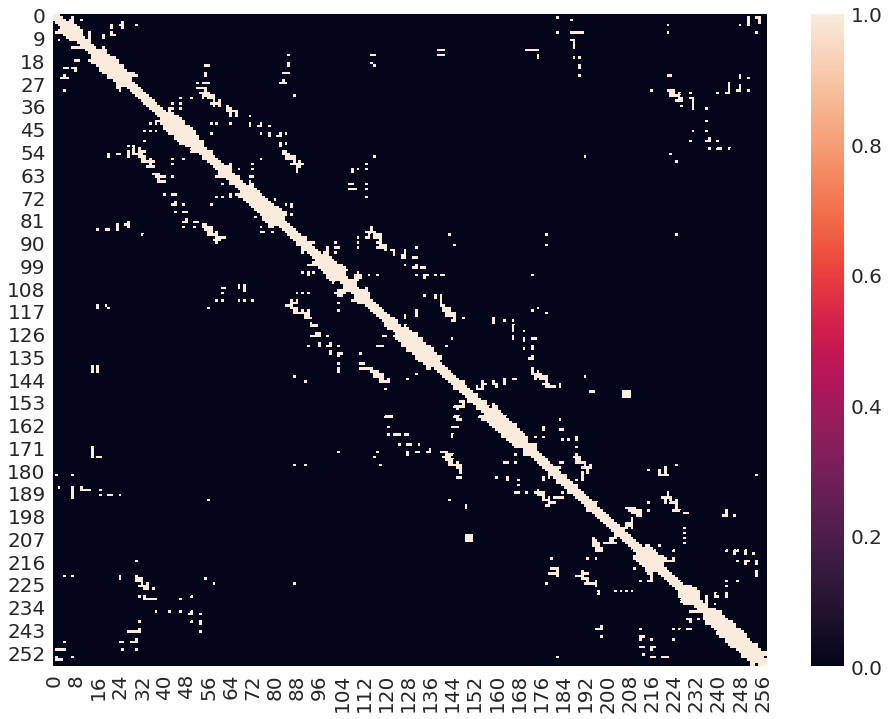

In [73]:
fg, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(q_adjacency_matrix)

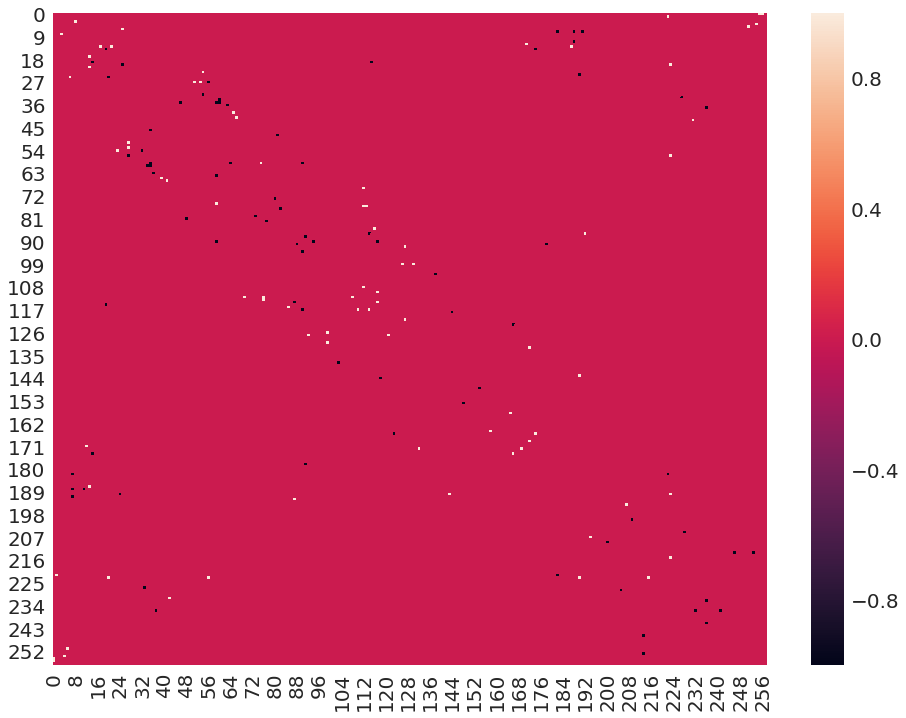

In [74]:
fg, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(s_adjacency_matrix - q_adjacency_matrix)

In [76]:
row

Pandas(Index=38, uniparc_id='UPI0003593D21', sequence='ACKELSFGARAELPGVHPLASKLLRLMQKKETNLCLSADVSEARELLQLADTLGPSICMLKTHVDILNDFTLDVMEELAALAKRHEFLIFEDRKFADIGNTVKKQYEGGIFKIASWADLVNAHVVPGSGVVKGLQEVGLPLHRACLLIAEMSSAGSLATGNYTKAAVGMAEEHCGFVVGFISGSRVSMKPEFLHLTPGVQLETGGDHLGQQYNSPQEVIGKRGSDVIIVGRGILAADNRLEAAEMYRKAAWEAYLNRLSV', database='Gene3D', interpro_name='Aldolase-type TIM barrel', interpro_id='IPR013785', domain_start=221, domain_end=480, _8=719212394, domain_length=260, structure_id='3MO7', model_id=0.0, chain_id='A', pc_identity=90.310000000000002, alignment_length=258.0, mismatches=25.0, gap_opens=0.0, q_start=3.0, q_end=260.0, s_start=1.0, s_end=258.0, evalue_log10=-170.52287874528034, bitscore=478.0, qseq='KELSFGARAELPGVHPLASKLLRLMQKKETNLCLSADVSEARELLQLADTLGPSICMLKTHVDILNDFTLDVMEELAALAKRHEFLIFEDRKFADIGNTVKKQYEGGIFKIASWADLVNAHVVPGSGVVKGLQEVGLPLHRACLLIAEMSSAGSLATGNYTKAAVGMAEEHCGFVVGFISGSRVSMKPEFLHLTPGVQLETGGDHLGQQYNSPQEVIGKRGSDVIIVGRGILAADNRLEAAEMYRKAAWEAYLNRLSV', sseq='KELSFGARAELPRIHPV

In [77]:
row.interpro_id

'IPR013785'